In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

Our 3 datasets: (TODO: 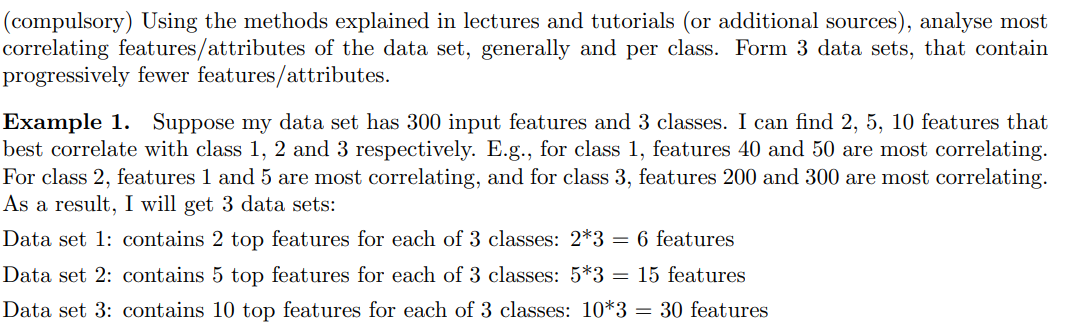)

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

our dataset which we used in this notebook ''mobile price'' here https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download

In [ ]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
bestf = SelectKBest(score_func=chi2, k=10) #we use the SelectKBest() to find K value
fit = bestf.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [ ]:
corr = data.corr()["ram"].sort_values(ascending=False)[1:]

In [ ]:
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Spaces','Score']

In [ ]:
print(featureScores.nlargest(5,'Score'))

           Spaces          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863


In [ ]:
train_model = ExtraTreesClassifier()
train_model.fit(X,y)
print(train_model.feature_importances_)

[0.06106145 0.01899333 0.03421827 0.01979799 0.03287384 0.0173295
 0.0352197  0.03326702 0.03603412 0.0328747  0.03348007 0.04774364
 0.05008197 0.38980075 0.03450355 0.03433904 0.03541098 0.01474086
 0.01842647 0.01980276]


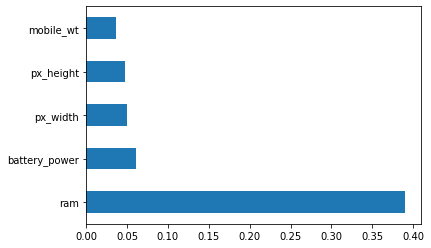

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(train_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
import seaborn as sns

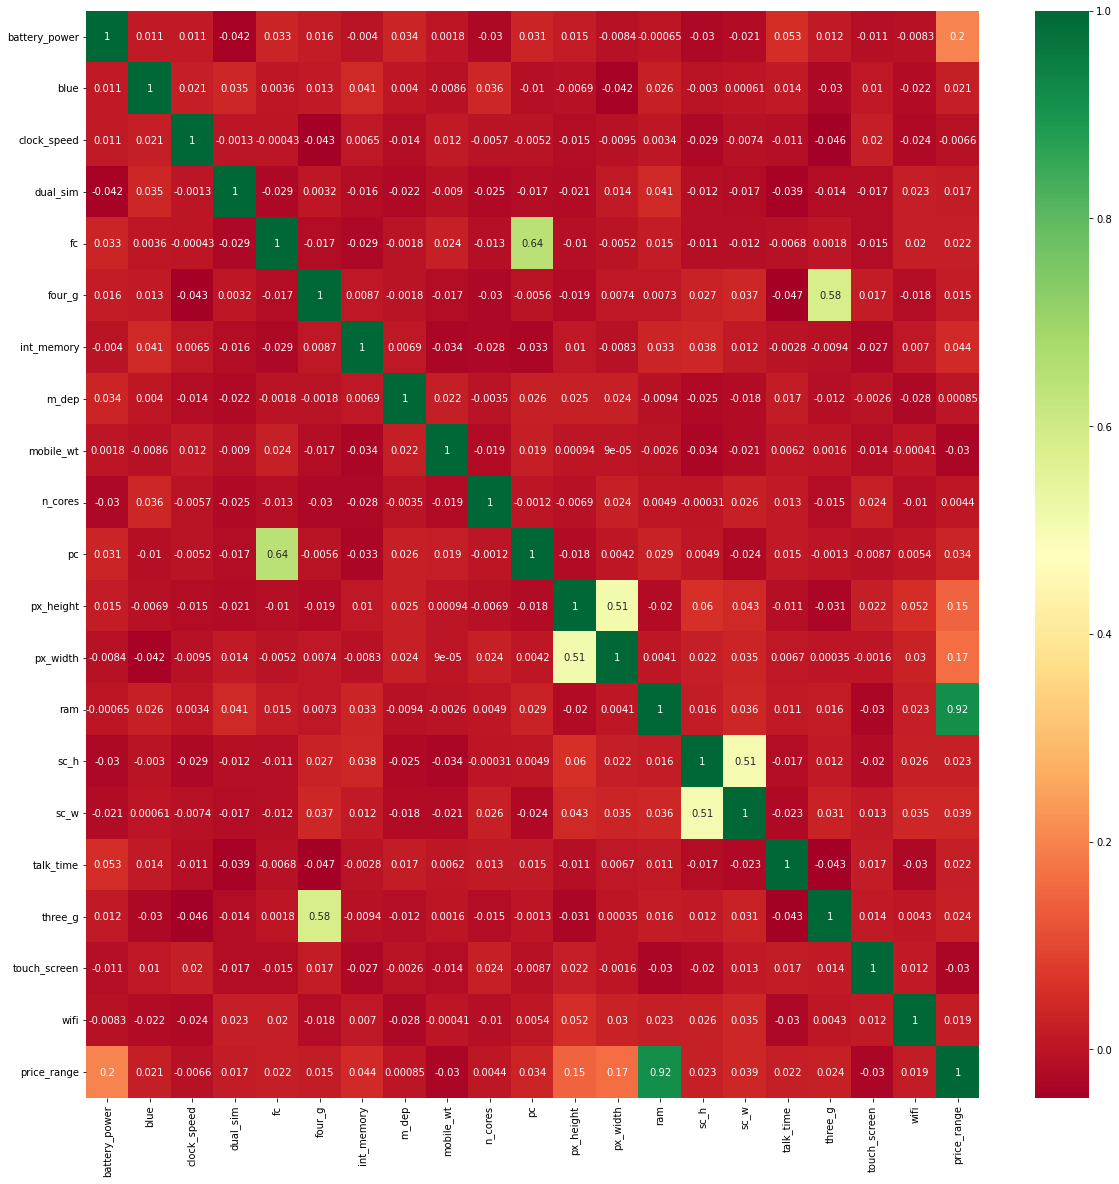

In [ ]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Looking at the last row (price range) to see how price range correlates with other features, ram is highly correlated with price range, followed by battery level, pixel height and width, while m_dep, clock_speed and n_cores seem to be the least correlated with price range .
In this dataset we discovered how to use univariate selection techniques and features to select correlation matrices, and to select relevant features from the data. **Significant effect**

In [ ]:
from sklearn.datasets import load_boston

We then wanted to test our selection method by predicting a house price dataset. The following filter method uses univariate statistics to assess whether there is a statistically significant relationship from each input feature to the target feature. What we're trying to predict. The features that provide the "highest confidence" are the ones we keep for the final model. 
**Formula for Pearson’s correlation coefficient** 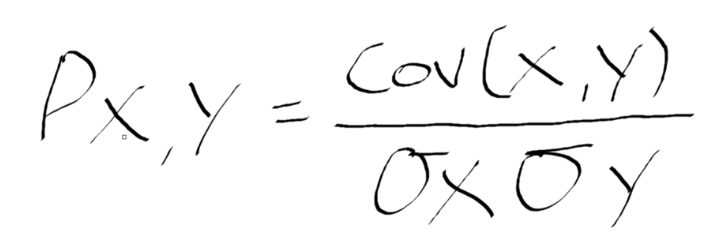

In [ ]:
# load data
boston_bunch = load_boston()
df = pd.DataFrame(data= boston_bunch.data,
                  columns= boston_bunch.feature_names)

# adding the target variable
df["target"] = boston_bunch.target
df.head() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Pearson correlation coefficient
corr = df.corr()["target"].sort_values(ascending=False)[1:]

In [ ]:
# absolute for positive values
abs_corr = abs(corr)

In [ ]:
# random threshold for features to keep
relevant_features = abs_corr[abs_corr>0.4]
relevant_features

RM         0.695360
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
LSTAT      0.737663
Name: target, dtype: float64

It can be seen that there are many advantages of this filtering method, Robust against overfitting (that would introduce bias). Much faster than the top single-variable selection, we can get more detailed variables for training